<a href="https://colab.research.google.com/github/Kahfinity/GoogleColabTask/blob/main/NewPraktikum3_Text_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text Processing**

---

### NPM  : 21441085
### Nama : Muhammad Al Kahfi


In [2]:
# Mengimpor modul `drive` dari `google.colab`
# Modul ini digunakan untuk mengintegrasikan Google Drive dengan Google Colab
from google.colab import drive

# Menghubungkan Google Drive ke sesi Google Colab
# Ini akan meminta izin untuk mengakses Google Drive Anda
# Setelah diizinkan, Google Drive akan di-mount ke direktori `/content/drive`
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd  # Mengimpor library pandas untuk manipulasi dan analisis data
import numpy as np  # Mengimpor library numpy untuk operasi numerik dan array

# Membaca file CSV yang berisi data tweet dan menyimpannya dalam dataframe 'TWEET_DATA'
# Gantilah path di bawah ini sesuai dengan lokasi file CSV Anda
TWEET_DATA = pd.read_csv("/content/drive/MyDrive/Dataset/bahlil(1).csv")

# Menampilkan 5 baris pertama dari dataframe 'TWEET_DATA' untuk melihat struktur dan isi data
TWEET_DATA.head()

,conversation_id_str,full_text,id_str,user_id_str,username
0,1897660064498139228,@minasr_ismine Bahlil kedua entar bentar lg ad...,1897794424249499834,1752535388131094528,redstar3_
1,1897792097069236383,benci w liat muka bahlil,1897792097069236383,1850559592771862528,pacarhijey
2,1897791807137730856,Bahlil Lahadalia Targetkan Investasi Capai Rp....,1897791807137730856,721898354502930433,golkarpedia
3,1897176679057178852,@Duren___ Lebanon di anugerahi Kahlil Gibran I...,1897785327852699932,1888593666371121152,Janjijoni_1
4,1897636538537681068,@KangManto123 Jadi ingat Bahlil jika ketemu Gi...,1897784591647490133,1231858064648572928,Untungrakatesa


In [4]:
# Mengubah semua teks dalam kolom 'full_text' menjadi huruf kecil
# Ini disebut sebagai case folding, yang berguna untuk normalisasi teks
TWEET_DATA['full_text'] = TWEET_DATA['full_text'].str.lower()

# Menampilkan hasil case folding
print('Case Folding Result : \n')

# Menampilkan 5 baris pertama dari kolom 'full_text' setelah diubah menjadi huruf kecil
print(TWEET_DATA['full_text'].head(5))

# Menambahkan beberapa baris kosong untuk pemisahan output
print('\n\n\n')

Case Folding Result : 

0    @minasr_ismine bahlil kedua entar bentar lg ad...
1                             benci w liat muka bahlil
2    bahlil lahadalia targetkan investasi capai rp....
3    @duren___ lebanon di anugerahi kahlil gibran i...
4    @kangmanto123 jadi ingat bahlil jika ketemu gi...
Name: full_text, dtype: object






In [5]:
import nltk  # Mengimpor library Natural Language Toolkit (nltk) untuk pemrosesan bahasa alami

# Mengunduh model 'punkt' yang digunakan untuk tokenisasi teks
# Tokenisasi adalah proses memecah teks menjadi bagian-bagian yang lebih kecil, seperti kata atau kalimat
nltk.download('punkt')

# Mengunduh model 'punkt_tab' yang merupakan variasi dari model 'punkt'
# Model ini juga digunakan untuk tokenisasi, tetapi mungkin memiliki fitur tambahan atau perbaikan
nltk.download('punkt_tab')  # Mengunduh model punkt_tab

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
import string  # Mengimpor modul string untuk manipulasi string
import re  # Mengimpor modul re untuk operasi pencocokan pola menggunakan regular expressions

from nltk.tokenize import word_tokenize  # Mengimpor fungsi word_tokenize dari NLTK untuk tokenisasi kata
from nltk.probability import FreqDist  # Mengimpor FreqDist untuk menghitung frekuensi kata

# --- Tokenizing ---

# Fungsi untuk menghapus karakter khusus dari teks tweet
def remove_tweet_special(text):
    # Mengganti karakter escape dengan spasi
    text = text.replace('\\t', ' ').replace('\\n', ' ').replace('\\u', ' ').replace('\\l', ' ')

    # Menghapus karakter non-ASCII dan menggantinya dengan karakter pengganti
    text = text.encode('ascii', 'replace').decode('ascii')

    # Menghapus mention (@username) dan hashtag (#hashtag) serta URL dari teks
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())

    # Menghapus protokol http dan https dari teks
    return text.replace("http://", " ").replace("https://", " ")

# Menerapkan fungsi remove_tweet_special ke kolom 'full_text' dalam dataframe TWEET_DATA
# Ini akan membersihkan teks tweet dari karakter khusus dan elemen yang tidak diinginkan
TWEET_DATA['full_text'] = TWEET_DATA['full_text'].apply(remove_tweet_special)

In [7]:
# --- Remove Number ---
# Fungsi untuk menghapus semua angka dari teks
def remove_number(text):
    # Menggunakan regex untuk mengganti semua digit (angka) dengan string kosong
    return re.sub(r"\d+", "", text)

# Menerapkan fungsi remove_number ke kolom 'full_text' dalam dataframe TWEET_DATA
# Ini akan menghapus semua angka dari teks tweet
TWEET_DATA['full_text'] = TWEET_DATA['full_text'].apply(remove_number)

# --- Remove Punctuation ---
# Fungsi untuk menghapus tanda baca dari teks
def remove_punctuation(text):
    # Menggunakan translate untuk menghapus semua tanda baca yang ada dalam string.punctuation
    return text.translate(str.maketrans("", "", string.punctuation))

# Menerapkan fungsi remove_punctuation ke kolom 'full_text' dalam dataframe TWEET_DATA
# Ini akan menghapus semua tanda baca dari teks tweet
TWEET_DATA['full_text'] = TWEET_DATA['full_text'].apply(remove_punctuation)

# --- Remove Whitespace (Leading & Trailing) ---
# Fungsi untuk menghapus spasi di awal dan akhir teks
def remove_whitespace_lt(text):
    # Menggunakan strip() untuk menghapus spasi di awal dan akhir string
    return text.strip()

# Menerapkan fungsi remove_whitespace_lt ke kolom 'full_text' dalam dataframe TWEET_DATA
# Ini akan menghapus spasi yang tidak diinginkan di awal dan akhir teks tweet
TWEET_DATA['full_text'] = TWEET_DATA['full_text'].apply(remove_whitespace_lt)

In [8]:
# --- Remove Single Character ---
# Fungsi untuk menghapus karakter tunggal (huruf) dari teks
def remove_single_char(text):
    # Menggunakan regex untuk mengganti karakter tunggal (a-z atau A-Z) yang berdiri sendiri dengan string kosong
    return re.sub(r"\b[a-zA-Z]\b", "", text)

# Menerapkan fungsi remove_single_char ke kolom 'full_text' dalam dataframe TWEET_DATA
# Ini akan menghapus semua karakter tunggal dari teks tweet
TWEET_DATA['full_text'] = TWEET_DATA['full_text'].apply(remove_single_char)

# --- NLTK Word Tokenize ---
# Fungsi untuk melakukan tokenisasi kata menggunakan NLTK
def word_tokenize_wrapper(text):
    # Menggunakan fungsi word_tokenize untuk memecah teks menjadi kata-kata
    return word_tokenize(text)

# Menerapkan fungsi word_tokenize_wrapper ke kolom 'full_text' dalam dataframe TWEET_DATA
# Hasil tokenisasi akan disimpan dalam kolom baru 'tweet_tokens'
TWEET_DATA['tweet_tokens'] = TWEET_DATA['full_text'].apply(word_tokenize_wrapper)

# Menampilkan hasil tokenisasi
print('Tokenizing Result : \n')
# Menampilkan 5 baris pertama dari kolom 'tweet_tokens' untuk melihat hasil tokenisasi
print(TWEET_DATA['tweet_tokens'].head())
print('\n\n\n')

Tokenizing Result : 

0    [ismine, bahlil, kedua, entar, bentar, lg, ada...
1                          [benci, liat, muka, bahlil]
2    [bahlil, lahadalia, targetkan, investasi, capa...
3    [lebanon, di, anugerahi, kahlil, gibran, indon...
4    [jadi, ingat, bahlil, jika, ketemu, gibran, nu...
Name: tweet_tokens, dtype: object






In [9]:
# --- NLTK Frequency Distribution ---
# Fungsi untuk menghitung distribusi frekuensi dari token (kata) dalam teks
def freqDist_wrapper(text):
    # Menggunakan FreqDist dari NLTK untuk menghitung frekuensi kemunculan setiap kata
    return FreqDist(text)

# Menerapkan fungsi freqDist_wrapper ke kolom 'tweet_tokens' dalam dataframe TWEET_DATA
# Hasil distribusi frekuensi akan disimpan dalam kolom baru 'tweet_tokens_fdist'
TWEET_DATA['tweet_tokens_fdist'] = TWEET_DATA['tweet_tokens'].apply(freqDist_wrapper)

# Menampilkan hasil distribusi frekuensi token
print('Frequency Tokens : \n')
# Menampilkan 5 baris pertama dari kolom 'tweet_tokens_fdist' dan mengambil kata-kata yang paling umum beserta frekuensinya
print(TWEET_DATA['tweet_tokens_fdist'].head().apply(lambda x: x.most_common()))
print('\n\n\n')

Frequency Tokens : 

0    [(ismine, 1), (bahlil, 1), (kedua, 1), (entar,...
1      [(benci, 1), (liat, 1), (muka, 1), (bahlil, 1)]
2    [(bahlil, 1), (lahadalia, 1), (targetkan, 1), ...
3    [(di, 2), (gibran, 2), (lebanon, 1), (anugerah...
4    [(gibran, 2), (jadi, 1), (ingat, 1), (bahlil, ...
Name: tweet_tokens_fdist, dtype: object






In [10]:
import nltk  # Mengimpor library Natural Language Toolkit (nltk) untuk pemrosesan bahasa alami

# Mengunduh daftar kata-kata umum (stopwords) dari NLTK
# Stopwords adalah kata-kata yang sering muncul dalam bahasa tetapi tidak memberikan makna penting,
# seperti "dan", "atau", "adalah", dan lain-lain. Menghapus stopwords dapat membantu dalam analisis teks.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
from nltk.corpus import stopwords  # Mengimpor daftar stopwords dari NLTK
import csv  # Mengimpor modul csv untuk membaca dan menulis file CSV

# --- Get Stopword from NLTK Stopword ---
# Mengambil daftar stopwords dalam bahasa Indonesia dari NLTK
list_stopwords = stopwords.words('indonesian')

# --- Manually Add Stopword ---
# Menambahkan stopwords tambahan secara manual ke dalam daftar stopwords
# Stopwords ini adalah kata-kata yang sering digunakan dalam bahasa sehari-hari
# tetapi tidak memberikan makna penting dalam analisis teks
list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo',
                       'kalo', 'amp', 'bian', 'bikin', 'bilang',
                       'gak', 'ga', 'kmn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

**Mencari Stopword Menggunakan Pandas (Dari CSV)**

In [12]:
import pandas as pd  # Mengimpor library pandas untuk manipulasi dan analisis data

# Membaca file CSV yang berisi data tweet yang telah dibersihkan
# dan menyimpannya dalam dataframe 'df'
df = pd.read_csv("/content/drive/MyDrive/Dataset/bahlil_cleaned(1).csv")

# Mengonversi kolom 'full_text' dari dataframe 'df' menjadi set
# Set adalah koleksi yang tidak mengizinkan duplikasi, sehingga hanya menyimpan kata-kata unik
# Dalam hal ini, 'stopwords_set' akan berisi semua teks unik dari kolom 'full_text'
stopwords_set = set(df['full_text'])

**Mencari Singkatan dan Normalisasi Kata dengan Dictionary**

In [13]:
import pandas as pd  # Mengimpor library pandas untuk manipulasi dan analisis data

# Menentukan path file CSV yang berisi data tweet yang telah dibersihkan
file_path = "/content/drive/MyDrive/Dataset/bahlil_cleaned(1).csv"
# Membaca file CSV ke dalam dataframe 'df' dengan encoding UTF-8
df = pd.read_csv(file_path, encoding="utf-8")

# Menentukan path file CSV yang berisi daftar singkatan dan bentuk normalnya
singkatan_file = "/content/drive/MyDrive/Dataset/singkatan-lib.csv"
# Membaca file CSV yang berisi singkatan ke dalam dataframe 'singkatan_df' dengan encoding UTF-8
singkatan_df = pd.read_csv(singkatan_file, encoding="utf-8")

# Mengonversi kolom 'singkatan' dan 'normal' dari dataframe 'singkatan_df' menjadi dictionary
# Kunci adalah singkatan, dan nilai adalah bentuk normalnya
singkatan_dict = dict(zip(singkatan_df['singkatan'], singkatan_df['normal']))

# Fungsi untuk melakukan normalisasi teks dengan mengganti singkatan dengan bentuk normalnya
def normalisasi_teks(teks, dict_singkatan):
    # Memecah teks menjadi kata-kata
    words = teks.split()
    # Mengganti setiap kata dengan bentuk normalnya jika ada dalam dictionary
    words = [dict_singkatan.get(word, word) for word in words]
    # Menggabungkan kembali kata-kata menjadi satu string
    return " ".join(words)

# Menerapkan fungsi normalisasi_teks ke kolom 'full_text' dalam dataframe 'df'
# Hasil normalisasi disimpan dalam kolom baru 'full_text_normalized'
df["full_text_normalized"] = df["full_text"].astype(str).apply(lambda x: normalisasi_teks(x, singkatan_dict))

# Menyimpan dataframe 'df' yang telah dinormalisasi ke dalam file CSV baru
df.to_csv("bahlil_normalized.csv", index=False, encoding="utf-8")

# Menampilkan 10 baris pertama dari kolom 'full_text' dan 'full_text_normalized' untuk melihat hasil normalisasi
(df[["full_text", "full_text_normalized"]].head(10))


,full_text,full_text_normalized
0,Bahlil kedua entar bentar lg ada pahlawan kesi...,Bahlil kedua nanti bentar lagi ada pahlawan ...
1,benci w liat muka bahlil,benci saya liat muka bahlil
2,Bahlil Lahadalia Targetkan Investasi Capai Rp....,Bahlil Lahadalia Targetkan Investasi Capai Rp....
3,Lebanon di anugerahi Kahlil Gibran Indonesia d...,Lebanon di anugerahi Kahlil Gibran Indonesia d...
4,Jadi ingat Bahlil jika ketemu Gibran nunduk sa...,Jadi ingat Bahlil jika ketemu Gibran nunduk sa...
5,Aamiin. Kanda Bahlil memang yang terbaik.,Aamiin. Kanda Bahlil memang yang terbaik.
6,Menteri ESDM Bahlil Lahadalia Siapkan Substitu...,Menteri ESDM Bahlil Lahadalia Siapkan Substitu...
7,tolong jelasin pake bahasa S3 bahlil soal lia ...,tolong jelasin pakai bahasa S3 bahlil soal li...
8,mungkin saja gak ketahuan tp nanti lu di akhir...,mungkin saja tidak ketahuan tapi nanti kamu di...
9,pusing gua begini ya rasanya jdi bayu sama aya...,pusing saya begini ya rasanya jadi bayu sama ...


**Continue >>>**

In [14]:
from nltk.corpus import stopwords  # Mengimpor daftar stopwords dari NLTK
import csv  # Mengimpor modul csv untuk membaca dan menulis file CSV

# --- Get Stopword from NLTK Stopword ---
# Mengambil daftar stopwords dalam bahasa Indonesia dari NLTK
list_stopwords = stopwords.words('indonesian')

# --- Manually Add Stopword ---
# Menambahkan stopwords tambahan secara manual ke dalam daftar stopwords
# Stopwords ini adalah kata-kata yang sering digunakan dalam bahasa sehari-hari
# tetapi tidak memberikan makna penting dalam analisis teks
list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo',
                       'kalo', 'amp', 'bian', 'bikin', 'bilang',
                       'gak', 'ga', 'kmn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# Membaca file teks yang berisi daftar stopwords tambahan
txt_stopword = pd.read_csv("/content/drive/MyDrive/Dataset/bahlil_cleaned_1_.txt", names=["stopwords"], header=None)

# Menambahkan stopwords dari file teks ke dalam daftar stopwords
# Menggunakan split untuk memisahkan kata-kata yang ada dalam satu baris
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# Mengonversi daftar stopwords menjadi set untuk menghindari duplikasi
list_stopwords = set(list_stopwords)

# Fungsi untuk menghapus stopwords dari daftar kata
def stopwords_removal(words):
    # Mengembalikan daftar kata yang tidak ada dalam daftar stopwords
    return [word for word in words if word not in list_stopwords]

# Menerapkan fungsi stopwords_removal ke kolom 'tweet_tokens' dalam dataframe TWEET_DATA
# Hasilnya disimpan dalam kolom baru 'tweet_tokens_MSM'
TWEET_DATA['tweet_tokens_MSM'] = TWEET_DATA['tweet_tokens'].apply(stopwords_removal)

# Menampilkan 5 baris pertama dari kolom 'tweet_tokens_MSM' untuk melihat hasil penghapusan stopwords
print(TWEET_DATA['tweet_tokens_MSM'].head())

0    [ismine, bahlil, entar, bentar, lg, pahlawan, ...
1                          [benci, liat, muka, bahlil]
2    [bahlil, lahadalia, targetkan, investasi, capa...
3    [lebanon, anugerahi, kahlil, gibran, indonesia...
4    [bahlil, ketemu, gibran, nunduk, cium, tangan,...
Name: tweet_tokens_MSM, dtype: object


In [15]:
# Membaca file CSV yang berisi daftar singkatan dan bentuk normalnya
normalized_word = pd.read_csv("/content/drive/MyDrive/Dataset/singkatan-lib.csv")

# Membuat dictionary kosong untuk menyimpan singkatan dan bentuk normalnya
normalized_word_dict = {}

# Mengiterasi setiap baris dalam dataframe normalized_word
for index, row in normalized_word.iterrows():
    # Memeriksa apakah singkatan sudah ada dalam dictionary
    if row[0] not in normalized_word_dict:
        # Menambahkan singkatan dan bentuk normalnya ke dalam dictionary
        normalized_word_dict[row[0]] = row[1]

# Fungsi untuk mengganti singkatan dalam dokumen dengan bentuk normalnya
def normalized_term(document):
    # Mengembalikan daftar kata yang telah dinormalisasi
    # Jika kata ada dalam dictionary, ganti dengan bentuk normalnya, jika tidak, tetap gunakan kata aslinya
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

# Menerapkan fungsi normalized_term ke kolom 'tweet_tokens_MSM' dalam dataframe TWEET_DATA
# Hasil normalisasi disimpan dalam kolom baru 'tweet_normalized'
TWEET_DATA['tweet_normalized'] = TWEET_DATA['tweet_tokens_MSM'].apply(normalized_term)

# Menampilkan 10 baris pertama dari kolom 'tweet_normalized' untuk melihat hasil normalisasi
TWEET_DATA['tweet_normalized'].head(10)

<ipython-input-15-4a8d08668718>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalized_word_dict:
<ipython-input-15-4a8d08668718>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalized_word_dict[row[0]] = row[1]


,tweet_normalized
0,"[ismine, bahlil, nanti , bentar, lagi , pahlaw..."
1,"[benci, liat, muka, bahlil]"
2,"[bahlil, lahadalia, targetkan, investasi, capa..."
3,"[lebanon, anugerahi, kahlil, gibran, indonesia..."
4,"[bahlil, ketemu, gibran, nunduk, cium, tangan,..."
5,"[mancing, amin , kanda, bahlil, terbaik]"
6,"[menteri, esdm, bahlil, lahadalia, siapkan, su..."
7,"[tolong, jelasin, pakai , bahasa, bahlil, lia,..."
8,"[ketahuan, tapi , kamu , akhirat, room, bahlil]"
9,"[pusing, saya , jadi , bayu, ayak, saya , tudu..."


In [16]:
TWEET_DATA

,conversation_id_str,full_text,id_str,user_id_str,username,tweet_tokens,tweet_tokens_fdist,tweet_tokens_MSM,tweet_normalized
0,1897660064498139228,ismine bahlil kedua entar bentar lg ada pahlaw...,1897794424249499834,1752535388131094528,redstar3_,"[ismine, bahlil, kedua, entar, bentar, lg, ada...","{'ismine': 1, 'bahlil': 1, 'kedua': 1, 'entar'...","[ismine, bahlil, entar, bentar, lg, pahlawan, ...","[ismine, bahlil, nanti , bentar, lagi , pahlaw..."
1,1897792097069236383,benci liat muka bahlil,1897792097069236383,1850559592771862528,pacarhijey,"[benci, liat, muka, bahlil]","{'benci': 1, 'liat': 1, 'muka': 1, 'bahlil': 1}","[benci, liat, muka, bahlil]","[benci, liat, muka, bahlil]"
2,1897791807137730856,bahlil lahadalia targetkan investasi capai rp ...,1897791807137730856,721898354502930433,golkarpedia,"[bahlil, lahadalia, targetkan, investasi, capa...","{'bahlil': 1, 'lahadalia': 1, 'targetkan': 1, ...","[bahlil, lahadalia, targetkan, investasi, capa...","[bahlil, lahadalia, targetkan, investasi, capa..."
3,1897176679057178852,lebanon di anugerahi kahlil gibran indonesia d...,1897785327852699932,1888593666371121152,Janjijoni_1,"[lebanon, di, anugerahi, kahlil, gibran, indon...","{'lebanon': 1, 'di': 2, 'anugerahi': 1, 'kahli...","[lebanon, anugerahi, kahlil, gibran, indonesia...","[lebanon, anugerahi, kahlil, gibran, indonesia..."
4,1897636538537681068,jadi ingat bahlil jika ketemu gibran nunduk sa...,1897784591647490133,1231858064648572928,Untungrakatesa,"[jadi, ingat, bahlil, jika, ketemu, gibran, nu...","{'jadi': 1, 'ingat': 1, 'bahlil': 1, 'jika': 1...","[bahlil, ketemu, gibran, nunduk, cium, tangan,...","[bahlil, ketemu, gibran, nunduk, cium, tangan,..."
...,...,...,...,...,...,...,...,...,...
103,1897525266211278978,asmara demi allah masih heranini dulu jkw nemu...,1897621575027085716,1161314598504370176,bbiblegum,"[asmara, demi, allah, masih, heranini, dulu, j...","{'asmara': 1, 'demi': 1, 'allah': 1, 'masih': ...","[asmara, allah, heranini, jkw, nemu, dimana, h...","[asmara, allah, heranini, jkw, temu , dimana, ..."
104,1897535154987454558,astapirwo mantap,1897621476087619911,467555804,timkatakanputus,"[astapirwo, mantap]","{'astapirwo': 1, 'mantap': 1}","[astapirwo, mantap]","[astapirwo, mantap]"
105,1897617639851332067,alv mungkin kaya bahlil,1897621241269485798,1487577313386856451,dianaoktvynn,"[alv, mungkin, kaya, bahlil]","{'alv': 1, 'mungkin': 1, 'kaya': 1, 'bahlil': 1}","[alv, kaya, bahlil]","[alv, kaya, bahlil]"
106,1897620768395346096,bjir lunarnya jadi tinggi gini punya kaki seen...,1897620768395346096,1844798237162774528,limejerukk,"[bjir, lunarnya, jadi, tinggi, gini, punya, ka...","{'bjir': 1, 'lunarnya': 1, 'jadi': 1, 'tinggi'...","[bjir, lunarnya, gini, kaki, seengganya, pende...","[bjir, lunarnya, gini, kaki, seengganya, pende..."


In [17]:
!pip install Sastrawi
!pip install swifter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=d8dc779c32924d251c72553bbf6e9eadda902fcc35c09617b9460aaa24fb7f98
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter


In [18]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Mengimpor kelas StemmerFactory dari Sastrawi untuk melakukan stemming
import pandas as pd  # Mengimpor library pandas untuk manipulasi dan analisis data

# Membuat objek StemmerFactory untuk menghasilkan stemmer
factory = StemmerFactory()
# Membuat stemmer menggunakan factory yang telah dibuat
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada sebuah kata
def stemmed_wrapper(term):
    return stemmer.stem(term)  # Mengembalikan kata yang telah distem

# Membuat dictionary kosong untuk menyimpan kata-kata dan hasil stemmingnya
term_dict = {}

# Mengiterasi setiap dokumen dalam kolom 'full_text' dari dataframe TWEET_DATA
for document in TWEET_DATA['full_text']:
    # Mengiterasi setiap kata dalam dokumen
    for term in document:
        # Memeriksa apakah kata sudah ada dalam dictionary
        if term not in term_dict:
            term_dict[term] = ' '  # Menambahkan kata ke dalam dictionary jika belum ada

# Menampilkan jumlah kata unik yang telah dikumpulkan
print(len(term_dict))
print("---")

# Mengiterasi setiap kata dalam dictionary untuk melakukan stemming
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)  # Melakukan stemming dan menyimpan hasilnya
    print(term, ":", term_dict[term])  # Menampilkan kata asli dan hasil stemmingnya

# Menampilkan seluruh dictionary yang berisi kata-kata dan hasil stemmingnya
print(term_dict)
print("-----------------------------------------------------------------")

27
---
i : i
s : s
m : m
n : n
e : e
  : 
b : b
a : a
h : h
l : l
k : k
d : d
u : u
t : t
r : r
g : g
p : p
w : w
c : c
v : v
o : o
y : y
j : j
z : z
f : f
q : q
x : x
{'i': 'i', 's': 's', 'm': 'm', 'n': 'n', 'e': 'e', ' ': '', 'b': 'b', 'a': 'a', 'h': 'h', 'l': 'l', 'k': 'k', 'd': 'd', 'u': 'u', 't': 't', 'r': 'r', 'g': 'g', 'p': 'p', 'w': 'w', 'c': 'c', 'v': 'v', 'o': 'o', 'y': 'y', 'j': 'j', 'z': 'z', 'f': 'f', 'q': 'q', 'x': 'x'}
-----------------------------------------------------------------


In [19]:
import swifter  # Mengimpor library swifter untuk mempercepat proses aplikasi fungsi pada dataframe

# Fungsi untuk mendapatkan kata-kata yang telah distem dari sebuah dokumen
def get_stemmed_term(document):
    # Mengembalikan daftar kata yang telah distem berdasarkan dictionary term_dict
    return [term_dict[term] for term in document]

# Menerapkan fungsi get_stemmed_term ke kolom 'full_text' dalam dataframe TWEET_DATA
# Menggunakan swifter untuk mempercepat proses aplikasi fungsi
TWEET_DATA['tweet_tokens_stemmed'] = TWEET_DATA['full_text'].swifter.apply(get_stemmed_term)

# Menampilkan hasil kolom 'tweet_tokens_stemmed' yang berisi kata-kata yang telah distem
print(TWEET_DATA['tweet_tokens_stemmed'])

Pandas Apply:   0%|          | 0/108 [00:00<?, ?it/s]

0      [i, s, m, i, n, e, , b, a, h, l, i, l, , k, e,...
1      [b, e, n, c, i, , , l, i, a, t, , m, u, k, a, ...
2      [b, a, h, l, i, l, , l, a, h, a, d, a, l, i, a...
3      [l, e, b, a, n, o, n, , d, i, , a, n, u, g, e,...
4      [j, a, d, i, , i, n, g, a, t, , b, a, h, l, i,...
                             ...                        
103    [a, s, m, a, r, a, , d, e, m, i, , a, l, l, a,...
104      [a, s, t, a, p, i, r, w, o, , m, a, n, t, a, p]
105    [a, l, v, , m, u, n, g, k, i, n, , k, a, y, a,...
106    [b, j, i, r, , l, u, n, a, r, n, y, a, , j, a,...
107    [g, a, m, a, u, , m, i, n, t, a, , b, a, n, t,...
Name: tweet_tokens_stemmed, Length: 108, dtype: object


In [20]:
TWEET_DATA.to_csv("Text_Procesing")

In [21]:
import pandas as pd  # Mengimpor library pandas untuk manipulasi dan analisis data

# Membaca file CSV yang berisi data tweet dan menyimpannya dalam dataframe 'tweets'
tweets = pd.read_csv("/content/drive/MyDrive/Dataset/Text_Procesing")

# Mengiterasi setiap baris dalam kolom 'tweet_tokens' dari dataframe 'tweets'
for i, text in enumerate(tweets['tweet_tokens']):
    # Menghapus karakter tertentu dari teks tweet, seperti tanda kutip, koma, dan tanda kurung
    tweets['tweet_tokens'][i] = tweets['tweet_tokens'][i].replace("'", "").replace(',', '').replace(']', '').replace('[', '')

    # Membuat list kosong untuk menyimpan kata-kata
    list_words = []
    # Memecah teks tweet menjadi kata-kata dan menambahkannya ke dalam list_words
    for word in tweets['tweet_tokens'][i].split():
        list_words.append(word)

    # Mengupdate kolom 'tweet_tokens' dengan list kata-kata yang telah dipisahkan
    tweets['tweet_tokens'][i] = list_words

# Menampilkan dataframe 'tweets' setelah pemrosesan
tweets

<ipython-input-21-2cd7870f9e1c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['tweet_tokens'][i] = tweets['tweet_tokens'][i].replace("'", "").replace(',', '').replace(']', '').replace('[', '')
<ipython-input-21-2cd7870f9e1c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['tweet_tokens'][i] = list_words
<ipython-input-21-2cd7870f9e1c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['tweet_tokens'][i] = tweets

,Unnamed: 0,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,...,reply_count,retweet_count,tweet_url,user_id_str,username,tweet_tokens,tweet_tokens_fdist,tweet_tokens_MSM,tweet_normalized,tweet_tokens_stemmed
0,0,1897660064498139228,Thu Mar 06 23:40:24 +0000 2025,3,ismine bahlil kedua entar bentar lg ada pahlaw...,1897794424249499834,NaN,minasr_ismine,in,NaN,...,0,2,https://x.com/redstar3_/status/189779442424949...,1752535388131094528,redstar3_,"[ismine, bahlil, kedua, entar, bentar, lg, ada...",<FreqDist with 10 samples and 10 outcomes>,"['ismine', 'bahlil', 'entar', 'bentar', 'lg', ...","['ismine', 'bahlil', 'nanti ', 'bentar', 'lagi...","['i', 's', 'm', 'i', 'n', 'e', '', 'b', 'a', '..."
1,1,1897792097069236383,Thu Mar 06 23:31:09 +0000 2025,0,benci liat muka bahlil,1897792097069236383,NaN,NaN,in,NaN,...,0,0,https://x.com/pacarhijey/status/18977920970692...,1850559592771862528,pacarhijey,"[benci, liat, muka, bahlil]",<FreqDist with 4 samples and 4 outcomes>,"['benci', 'liat', 'muka', 'bahlil']","['benci', 'liat', 'muka', 'bahlil']","['b', 'e', 'n', 'c', 'i', '', '', 'l', 'i', 'a..."
2,2,1897791807137730856,Thu Mar 06 23:30:00 +0000 2025,6,bahlil lahadalia targetkan investasi capai rp ...,1897791807137730856,NaN,NaN,in,"DKI Jakarta, Indonesia",...,0,39,https://x.com/golkarpedia/status/1897791807137...,721898354502930433,golkarpedia,"[bahlil, lahadalia, targetkan, investasi, capa...",<FreqDist with 10 samples and 10 outcomes>,"['bahlil', 'lahadalia', 'targetkan', 'investas...","['bahlil', 'lahadalia', 'targetkan', 'investas...","['b', 'a', 'h', 'l', 'i', 'l', '', 'l', 'a', '..."
3,3,1897176679057178852,Thu Mar 06 23:04:15 +0000 2025,1,lebanon di anugerahi kahlil gibran indonesia d...,1897785327852699932,NaN,Duren___,in,NaN,...,0,0,https://x.com/Janjijoni_1/status/1897785327852...,1888593666371121152,Janjijoni_1,"[lebanon, di, anugerahi, kahlil, gibran, indon...",<FreqDist with 10 samples and 12 outcomes>,"['lebanon', 'anugerahi', 'kahlil', 'gibran', '...","['lebanon', 'anugerahi', 'kahlil', 'gibran', '...","['l', 'e', 'b', 'a', 'n', 'o', 'n', '', 'd', '..."
4,4,1897636538537681068,Thu Mar 06 23:01:20 +0000 2025,0,jadi ingat bahlil jika ketemu gibran nunduk sa...,1897784591647490133,NaN,KangManto123,in,NaN,...,0,0,https://x.com/Untungrakatesa/status/1897784591...,1231858064648572928,Untungrakatesa,"[jadi, ingat, bahlil, jika, ketemu, gibran, nu...",<FreqDist with 16 samples and 17 outcomes>,"['bahlil', 'ketemu', 'gibran', 'nunduk', 'cium...","['bahlil', 'ketemu', 'gibran', 'nunduk', 'cium...","['j', 'a', 'd', 'i', '', 'i', 'n', 'g', 'a', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,1897525266211278978,Thu Mar 06 12:13:34 +0000 2025,49,asmara demi allah masih heranini dulu jkw nemu...,1897621575027085716,NaN,Mdy_Asmara1701,in,"Semarang, Jawa Tengah",...,16,5,https://x.com/bbiblegum/status/189762157502708...,1161314598504370176,bbiblegum,"[asmara, demi, allah, masih, heranini, dulu, j...",<FreqDist with 15 samples and 15 outcomes>,"['asmara', 'allah', 'heranini', 'jkw', 'nemu',...","['asmara', 'allah', 'heranini', 'jkw', 'temu '...","['a', 's', 'm', 'a', 'r', 'a', '', 'd', 'e', '..."
104,104,1897535154987454558,Thu Mar 06 12:13:10 +0000 2025,0,astapirwo mantap,1897621476087619911,NaN,fentyam_,in,Konoha,...,1,0,https://x.com/timkatakanputus/status/189762147...,467555804,timkatakanputus,"[astapirwo, mantap]",<FreqDist with 2 samples and 2 outcomes>,"['astapirwo', 'mantap']","['astapirwo', 'mantap']","['a', 's', 't', 'a', 'p', 'i', 'r', 'w', 'o', ..."
105,105,1897617639851332067,Thu Mar 06 12:12:14 +0000 2025,0,alv mungkin kaya bahlil,1897621241269485798,NaN,DoN_aLv99,in,"Bogor, Jawa Barat",...,1,0,https://x.com/dianaoktvynn/status/189762124126...,1487577313386856451,dianaoktvynn,"[alv, mungkin, kaya, bahlil]",<FreqDist with 4 samples and 4 outcomes>,"['alv', 'kaya', 'bahlil']","['alv', 'kaya', 'bahlil']","['a', 'l

**Continue >> Pertemuan 4**

In [22]:
!pip install nlp-id

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.8 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=c82eb41499152afdce28873767c41a6894c446dd9deaa28d89035f6920b83153
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninst

In [23]:
# Loads lexicon positive and negative data

# Import library CSV
import csv

# Load lexicon positive data from CSV file
lexicon_positive = dict()
with open('/content/drive/MyDrive/Dataset/lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

# Load lexicon negative data from CSV file
lexicon_negative = dict()
with open('/content/drive/MyDrive/Dataset/lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Function to determine sentiment polarity of tweets
def sentiment_analysis_lexicon_indonesia(text):
    # Initialize score to 0
    score = 0

    # Calculate score based on positive words
    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]

    # Calculate score based on negative words
    for word in text:
        if word in lexicon_negative:
            score += lexicon_negative[word]

    # Determine polarity based on the final score
    polarity = ''
    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [24]:
# Mengaplikasikan fungsi sentiment_analysis_lexicon_indonesia pada kolom 'tweet_baku'
results = tweets['tweet_tokens'].apply(sentiment_analysis_lexicon_indonesia)

# Mengubah hasil menjadi list of tuples, lalu unzip menjadi dua list terpisah: polarity_score dan polarity
results = list(zip(*results))
tweets['polarity_score'] = results[0]
tweets['polarity'] = results[1]

# Menampilkan distribusi nilai polaritas
print(tweets['polarity'].value_counts())

# Export DataFrame ke file CSV
tweets.to_csv(r'tweets_data_clean_polarity.csv', index=False, header=True, index_label=None)

polarity
negative    67
positive    23
neutral     18
Name: count, dtype: int64


In [25]:
tweets

,Unnamed: 0,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,...,tweet_url,user_id_str,username,tweet_tokens,tweet_tokens_fdist,tweet_tokens_MSM,tweet_normalized,tweet_tokens_stemmed,polarity_score,polarity
0,0,1897660064498139228,Thu Mar 06 23:40:24 +0000 2025,3,ismine bahlil kedua entar bentar lg ada pahlaw...,1897794424249499834,NaN,minasr_ismine,in,NaN,...,https://x.com/redstar3_/status/189779442424949...,1752535388131094528,redstar3_,"[ismine, bahlil, kedua, entar, bentar, lg, ada...",<FreqDist with 10 samples and 10 outcomes>,"['ismine', 'bahlil', 'entar', 'bentar', 'lg', ...","['ismine', 'bahlil', 'nanti ', 'bentar', 'lagi...","['i', 's', 'm', 'i', 'n', 'e', '', 'b', 'a', '...",-3,negative
1,1,1897792097069236383,Thu Mar 06 23:31:09 +0000 2025,0,benci liat muka bahlil,1897792097069236383,NaN,NaN,in,NaN,...,https://x.com/pacarhijey/status/18977920970692...,1850559592771862528,pacarhijey,"[benci, liat, muka, bahlil]",<FreqDist with 4 samples and 4 outcomes>,"['benci', 'liat', 'muka', 'bahlil']","['benci', 'liat', 'muka', 'bahlil']","['b', 'e', 'n', 'c', 'i', '', '', 'l', 'i', 'a...",0,neutral
2,2,1897791807137730856,Thu Mar 06 23:30:00 +0000 2025,6,bahlil lahadalia targetkan investasi capai rp ...,1897791807137730856,NaN,NaN,in,"DKI Jakarta, Indonesia",...,https://x.com/golkarpedia/status/1897791807137...,721898354502930433,golkarpedia,"[bahlil, lahadalia, targetkan, investasi, capa...",<FreqDist with 10 samples and 10 outcomes>,"['bahlil', 'lahadalia', 'targetkan', 'investas...","['bahlil', 'lahadalia', 'targetkan', 'investas...","['b', 'a', 'h', 'l', 'i', 'l', '', 'l', 'a', '...",-1,negative
3,3,1897176679057178852,Thu Mar 06 23:04:15 +0000 2025,1,lebanon di anugerahi kahlil gibran indonesia d...,1897785327852699932,NaN,Duren___,in,NaN,...,https://x.com/Janjijoni_1/status/1897785327852...,1888593666371121152,Janjijoni_1,"[lebanon, di, anugerahi, kahlil, gibran, indon...",<FreqDist with 10 samples and 12 outcomes>,"['lebanon', 'anugerahi', 'kahlil', 'gibran', '...","['lebanon', 'anugerahi', 'kahlil', 'gibran', '...","['l', 'e', 'b', 'a', 'n', 'o', 'n', '', 'd', '...",1,positive
4,4,1897636538537681068,Thu Mar 06 23:01:20 +0000 2025,0,jadi ingat bahlil jika ketemu gibran nunduk sa...,1897784591647490133,NaN,KangManto123,in,NaN,...,https://x.com/Untungrakatesa/status/1897784591...,1231858064648572928,Untungrakatesa,"[jadi, ingat, bahlil, jika, ketemu, gibran, nu...",<FreqDist with 16 samples and 17 outcomes>,"['bahlil', 'ketemu', 'gibran', 'nunduk', 'cium...","['bahlil', 'ketemu', 'gibran', 'nunduk', 'cium...","['j', 'a', 'd', 'i', '', 'i', 'n', 'g', 'a', '...",-3,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,1897525266211278978,Thu Mar 06 12:13:34 +0000 2025,49,asmara demi allah masih heranini dulu jkw nemu...,1897621575027085716,NaN,Mdy_Asmara1701,in,"Semarang, Jawa Tengah",...,https://x.com/bbiblegum/status/189762157502708...,1161314598504370176,bbiblegum,"[asmara, demi, allah, masih, heranini, dulu, j...",<FreqDist with 15 samples and 15 outcomes>,"['asmara', 'allah', 'heranini', 'jkw', 'nemu',...","['asmara', 'allah', 'heranini', 'jkw', 'temu '...","['a', 's', 'm', 'a', 'r', 'a', '', 'd', 'e', '...",1,positive
104,104,1897535154987454558,Thu Mar 06 12:13:10 +0000 2025,0,astapirwo mantap,1897621476087619911,NaN,fentyam_,in,Konoha,...,https://x.com/timkatakanputus/status/189762147...,467555804,timkatakanputus,"[astapirwo, mantap]",<FreqDist with 2 samples and 2 outcomes>,"['astapirwo', 'mantap']","['astapirwo', 'mantap']","['a', 's', 't', 'a', 'p', 'i', 'r', 'w', 'o', ...",5,positive
105,105,1897617639851332067,Thu Mar 06 12:12:14 +0000 2025,0,alv mungkin kaya bahlil,1897621241269485798,NaN,DoN_aLv99,in,"Bogor, Jawa Barat",...,https://x.com/dianaoktvynn/status/189762124126...,1487577313386856451,dianaoktvynn,"[alv, mungkin, kaya, bahlil]",<FreqDist with 4 samples and 4 outcomes>,"['alv', 'kaya', 'bahl

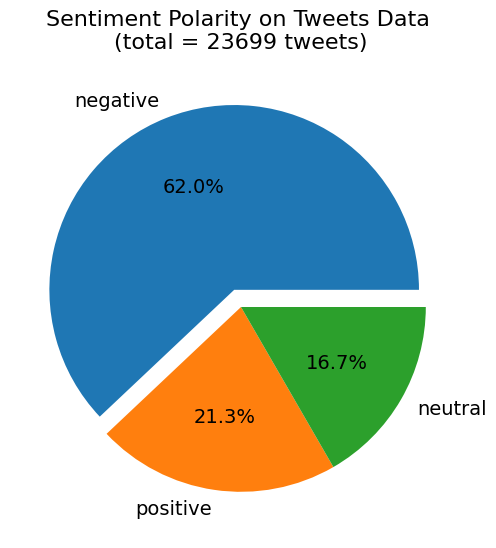

In [26]:
import matplotlib.pyplot as plt

sizes = [count for count in tweets['polarity'].value_counts()]
labels = list(tweets['polarity'].value_counts().index)
explode = (0.1, 0, 0)
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Tweets Data \n(total = 23699 tweets)', fontsize=16, pad=20)
plt.show()

In [27]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = tweets[tweets['polarity'] == 'positive']
positive_tweets = positive_tweets[['tweet_tokens', 'polarity_score', 'polarity']]
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1
positive_tweets[0:10]

,tweet_tokens,polarity_score,polarity
1,"[benaaar, selamat, di, mimpi, kamu, akan, dipopo, bahlil]",7,positive
2,"[feeling, gw, bahlil, pasti, terlibat, akan, peristiwa, ini]",6,positive
3,"[mancing, aamiin, kanda, bahlil, memang, yang, terbaik]",6,positive
4,"[astapirwo, mantap]",5,positive
5,"[tebak, yg, bener, dapet, popo, bahlil]",5,positive
6,"[emang, anakan, bahlil, lu, ini]",5,positive
7,"[gw, dukung, kettt, btw, bahlil, kapan, mundur]",4,positive
8,"[maxelyou, otak, komenan, ternak, mulyono, sama, kalau, seperti, wabpresmu, pakai, sepatu, trus, turun, nanti, cuma, foto, ga, ada, solusi, banjirnya, merata, makanya, perlu, kecepatan, untuk, melihat, dan, ambil, solusi, dasar, bahlil, eh, bahlul, loe, pada]",4,positive
9,"[yg, ketawa, anaknya, bahlil]",4,positive
10,"[ga, bisa, berword, word, nah, kawan, bahlil, bagaimana, menurut, anda]",3,positive


In [28]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = tweets[tweets['polarity'] == 'negative']
positive_tweets = positive_tweets[['tweet_tokens', 'polarity_score', 'polarity']]
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1
positive_tweets[0:10]

,tweet_tokens,polarity_score,polarity
1,"[bahlil, lahadalia, targetkan, investasi, capai, rp, triliun, untuk, proyek, hilirisasi]",-1,negative
2,"[rk, bagaimana, kalau, kita, tawur, bahlil]",-1,negative
3,"[kalo, gak, salah, ini, murid, bahlil]",-1,negative
4,"[udh, berusaha, semaksimal, mungkin, tp, hasilnya, bahlil]",-1,negative
5,"[alv, mungkin, kaya, bahlil]",-1,negative
6,"[anggaplah, anggapan, mbah, arief, benar, berarti, terjadi, pembiaran, bukan, kan, sontoloyo, itu, itu, tindakan, seorang, presiden, kok, bisa, demi, anak, karbitan, bisa, maju, wapres, demi, mantu, bisa, maju, gubernur, demi, anaknya, bisa, ketum, supaya, bahlil, bisa, ketum, presiden, macam, apa, itu]",-1,negative
7,"[sekte, kembang, kemboja, bawak, anggauta, rame, ke, kekaisaran, babak, belur, sumber, daya, kekaisaran]",-1,negative
8,"[muka, lu, lamalama, mirip, bahlil, aneh]",-1,negative
9,"[mending, pake, lgbt, gak, sih, luhut, gibran, bahlil, thohir]",-1,negative
10,"[gibran, bahlil, noel, juli, pada, ga, enak, diliat, mukanya]",-2,negative


In [29]:
from wordcloud import WordCloud
list_words = ''
for tweet in tweets['tweet_tokens']:
    for word in tweet:
        list_words += ' ' + word
        wordcloud = WordCloud(
    width=600,
    height=400,
    background_color='black',
    min_font_size=10
).generate(list_words)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud)
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

KeyboardInterrupt: 